<a href="https://www.kaggle.com/code/lalit7881/silver-gold-platinum-forecast-99-accuracy?scriptVersionId=295407161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/silver-gold-and-platinum-price-forecasting/precious_metals_historical_data.csv
/kaggle/input/silver-gold-and-platinum-price-forecasting/precious_metals_forecast_to_march2026.csv


## 📌 Project Title

Precious Metal Price Forecasting using Machine Learning & Time-Series Models

## 📖 Description

Developed an end-to-end predictive analytics system to forecast Gold prices using historical data of Silver, Gold, and Platinum. Applied both machine learning regression models and time-series forecasting techniques to compare performance and accuracy.

In [2]:
df = pd.read_csv("/kaggle/input/silver-gold-and-platinum-price-forecasting/precious_metals_forecast_to_march2026.csv")

In [3]:
df.head()

,Forecast_Date,Silver,Gold,Platinum
0,2026-02-08,90.920017,469.126537,208.800413
1,2026-02-15,92.130134,473.233084,211.135829
2,2026-02-22,93.340251,477.339632,213.471246
3,2026-03-01,94.550368,481.446180,215.806663
4,2026-03-08,95.760485,485.552727,218.142079


In [4]:
df.tail()

,Forecast_Date,Silver,Gold,Platinum
4,2026-03-08,95.760485,485.552727,218.142079
5,2026-03-15,96.970602,489.659275,220.477496
6,2026-03-22,98.180719,493.765823,222.812912
7,2026-03-29,99.390837,497.872370,225.148329
8,2026-04-05,99.874883,499.514989,226.082495


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Forecast_Date  9 non-null      object 
 1   Silver         9 non-null      float64
 2   Gold           9 non-null      float64
 3   Platinum       9 non-null      float64
dtypes: float64(3), object(1)
memory usage: 420.0+ bytes


In [6]:
df.describe()

,Silver,Gold,Platinum
count,9.000000,9.000000,9.000000
mean,95.679811,485.278957,217.986385
std,3.187918,10.818240,6.152393
min,90.920017,469.126537,208.800413
25%,93.340251,477.339632,213.471246
50%,95.760485,485.552727,218.142079
75%,98.180719,493.765823,222.812912
max,99.874883,499.514989,226.082495


In [7]:
df.isnull().sum()

Forecast_Date    0
Silver           0
Gold             0
Platinum         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Forecast_Date     object
Silver           float64
Gold             float64
Platinum         float64
dtype: object

In [10]:
df.shape

(9, 4)

In [11]:
df.columns

Index(['Forecast_Date', 'Silver', 'Gold', 'Platinum'], dtype='object')

In [12]:
# Convert date column
df["Forecast_Date"] = pd.to_datetime(df["Forecast_Date"])

# Sort by date (important for time series)
df = df.sort_values("Forecast_Date")

# Set style
sns.set(style="whitegrid")

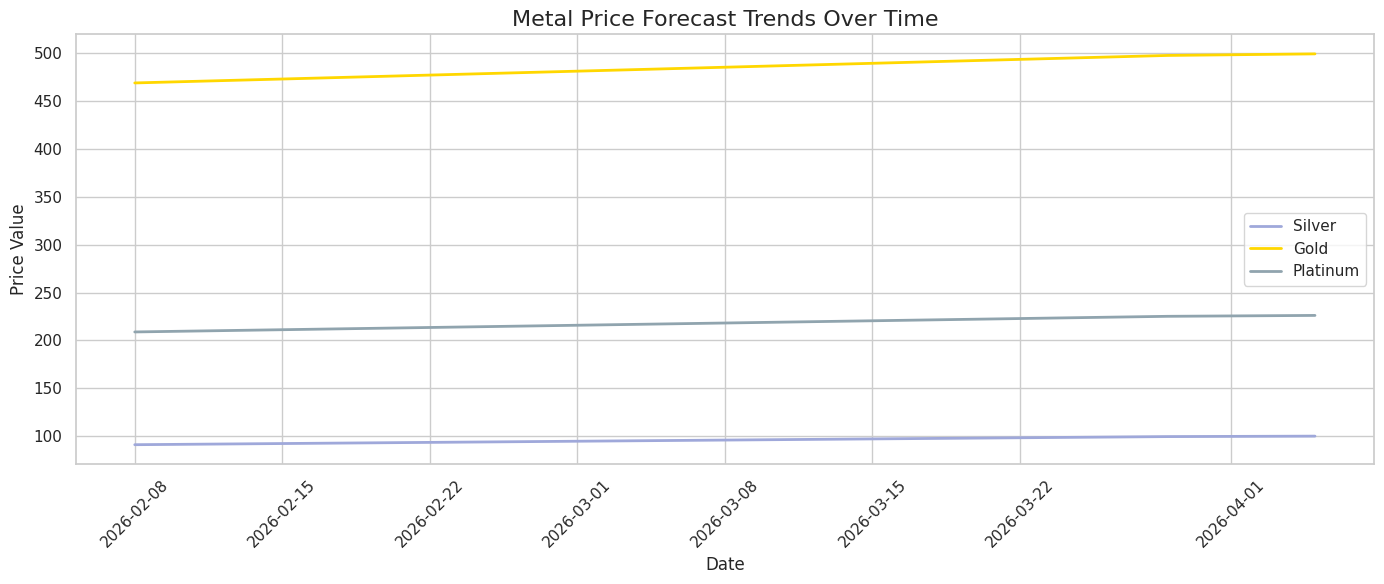

In [13]:
plt.figure(figsize=(14, 6))

plt.plot(df["Forecast_Date"], df["Silver"], 
         label="Silver", color="#9FA8DA", linewidth=2)

plt.plot(df["Forecast_Date"], df["Gold"], 
         label="Gold", color="#FFD700", linewidth=2)

plt.plot(df["Forecast_Date"], df["Platinum"], 
         label="Platinum", color="#90A4AE", linewidth=2)

plt.title("Metal Price Forecast Trends Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


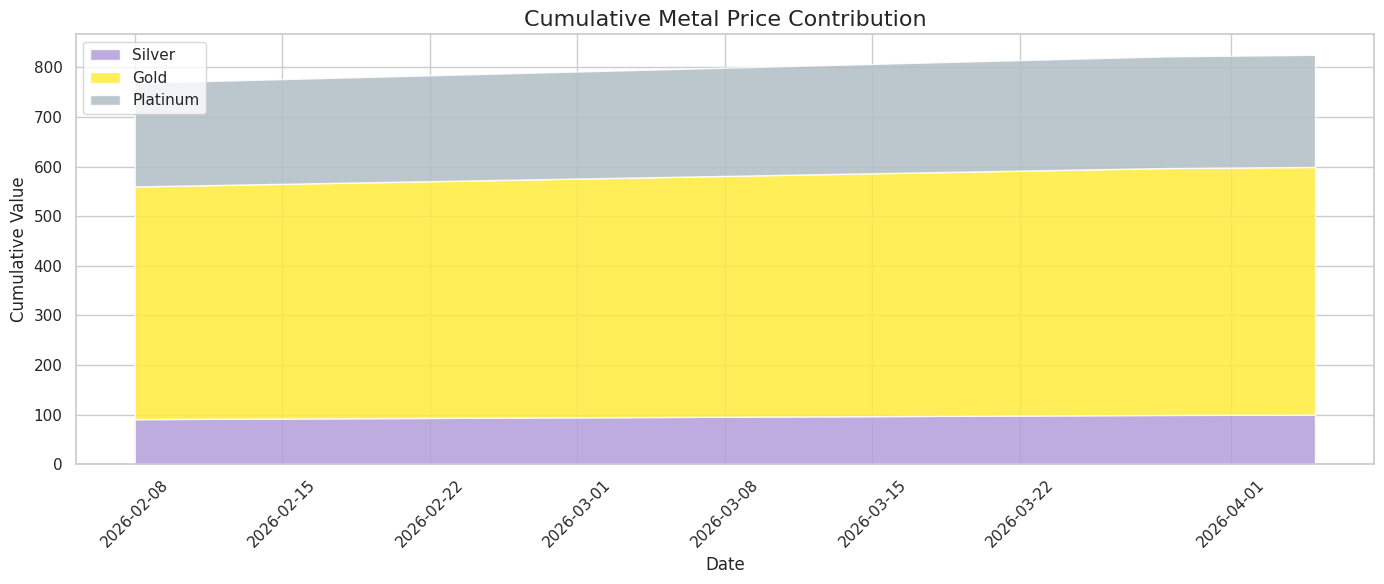

In [14]:
plt.figure(figsize=(14, 6))

plt.stackplot(
    df["Forecast_Date"],
    df["Silver"],
    df["Gold"],
    df["Platinum"],
    labels=["Silver", "Gold", "Platinum"],
    colors=["#B39DDB", "#FFEB3B", "#B0BEC5"],
    alpha=0.85
)

plt.title("Cumulative Metal Price Contribution", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Cumulative Value")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


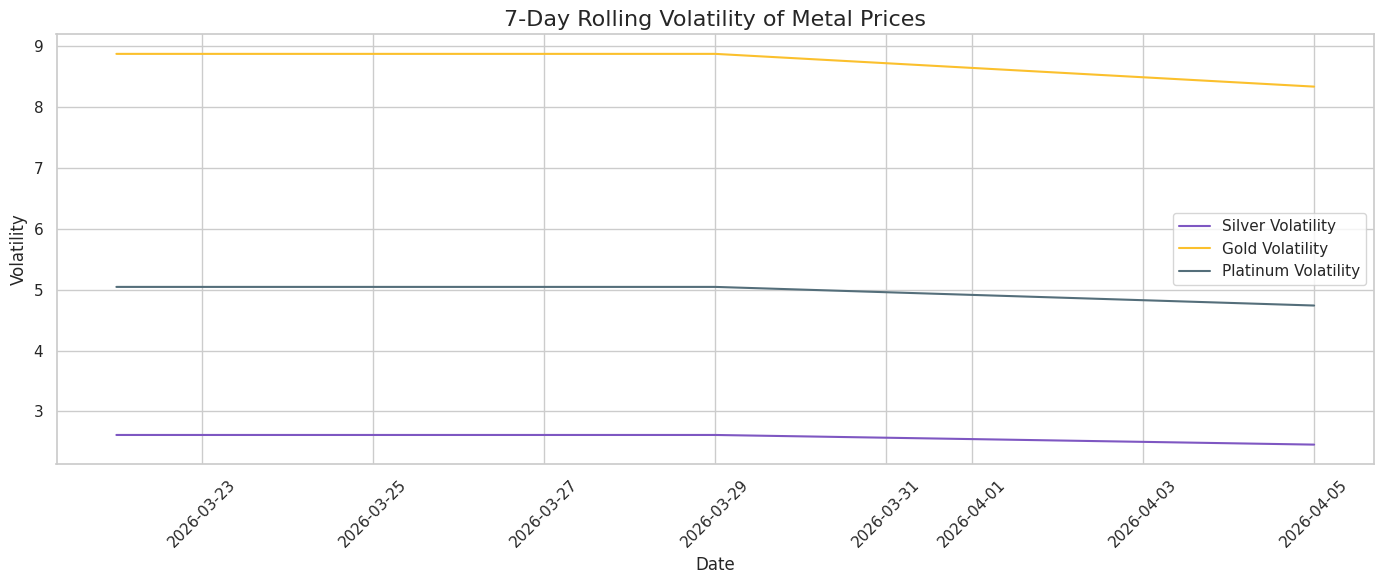

In [15]:
rolling_window = 7  # 7-day volatility

df["Silver_vol"] = df["Silver"].rolling(rolling_window).std()
df["Gold_vol"] = df["Gold"].rolling(rolling_window).std()
df["Platinum_vol"] = df["Platinum"].rolling(rolling_window).std()

plt.figure(figsize=(14, 6))

plt.plot(df["Forecast_Date"], df["Silver_vol"], 
         label="Silver Volatility", color="#7E57C2")

plt.plot(df["Forecast_Date"], df["Gold_vol"], 
         label="Gold Volatility", color="#FBC02D")

plt.plot(df["Forecast_Date"], df["Platinum_vol"], 
         label="Platinum Volatility", color="#546E7A")

plt.title("7-Day Rolling Volatility of Metal Prices", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


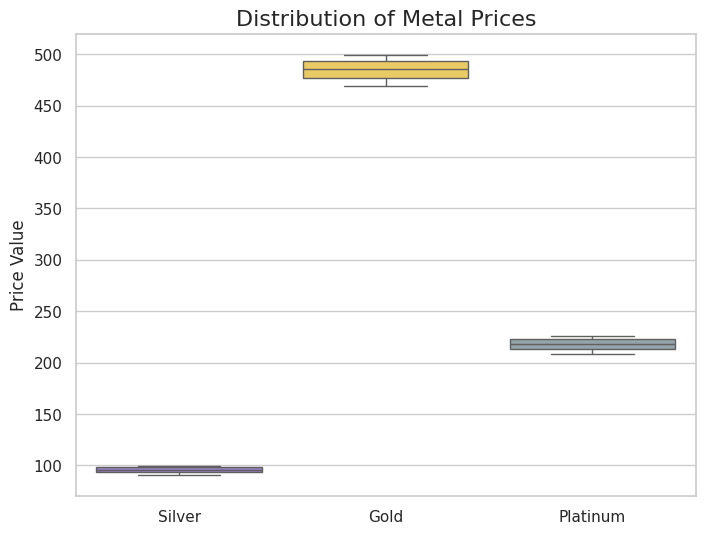

In [16]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df[["Silver", "Gold", "Platinum"]],
    palette=["#9575CD", "#FFD54F", "#90A4AE"]
)

plt.title("Distribution of Metal Prices", fontsize=16)
plt.ylabel("Price Value")
plt.show()


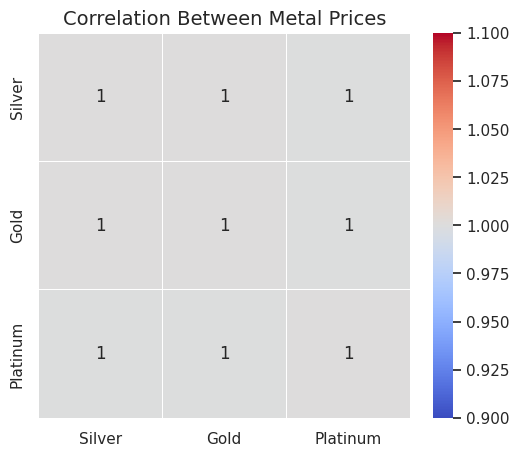

In [17]:
plt.figure(figsize=(6, 5))

sns.heatmap(
    df[["Silver", "Gold", "Platinum"]].corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Between Metal Prices", fontsize=14)
plt.show()


## Feature engg

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

In [19]:
le = LabelEncoder()
df["Forecast_Date"] = le.fit_transform(df["Forecast_Date"])


In [20]:
X = df[["Forecast_Date", "Silver", "Platinum"]]
y = df["Gold"]   # Target variable


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel="rbf")
}


In [23]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    accuracy = r2_score(y_test, y_pred) * 100   # Accuracy %

    results.append([name, rmse, accuracy])


In [24]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "RMSE", "Accuracy (%)"]
)

print(results_df.sort_values(by="Accuracy (%)", ascending=False))


               Model          RMSE  Accuracy (%)
0  Linear Regression  4.019437e-14    100.000000
2      Random Forest  1.174559e+00     99.091022
1      Decision Tree  3.127454e+00     93.555556
3                KNN  7.642152e+00     61.520000
4                SVR  1.229208e+01      0.446949


In [25]:
y = df["Silver"]
# OR
y = df["Platinum"]


In [26]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)

         Feature  Importance
1         Silver    0.367714
0  Forecast_Date    0.344962
2       Platinum    0.287325


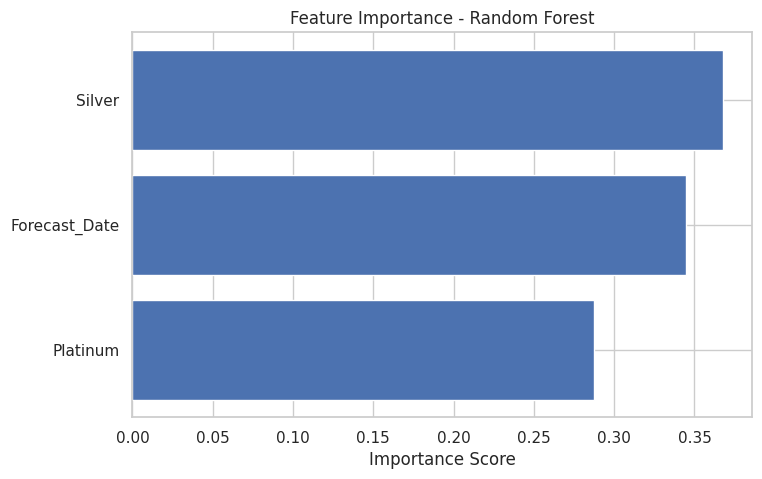

In [27]:
plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()


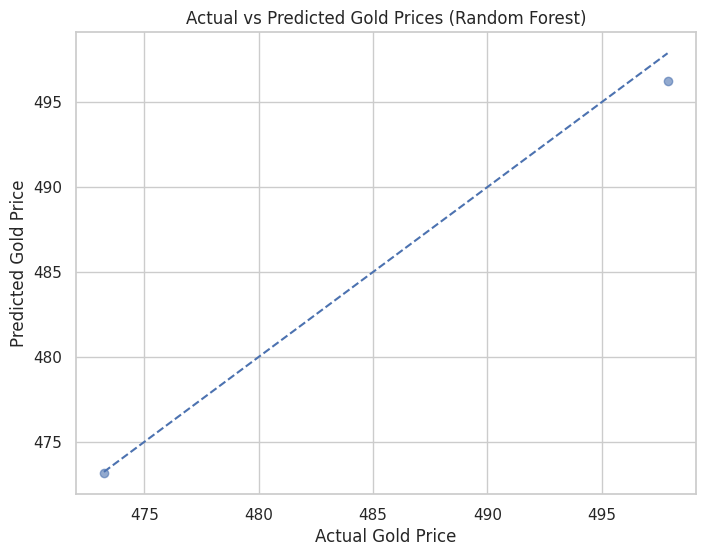

In [28]:
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")

plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Actual vs Predicted Gold Prices (Random Forest)")
plt.show()


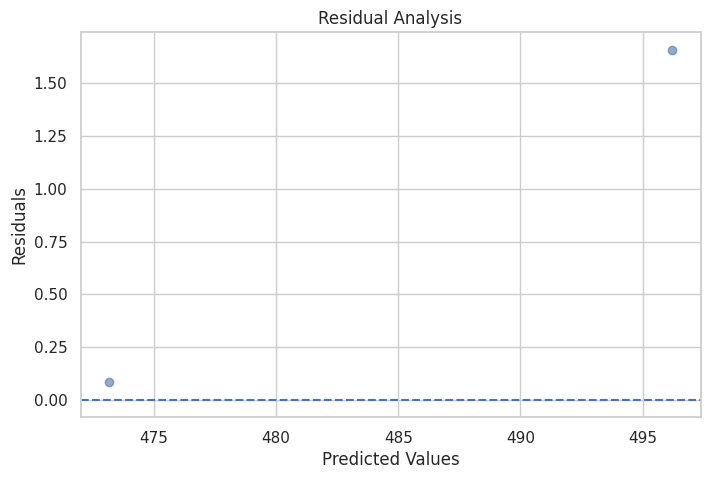

In [29]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_rf, residuals, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


## Thank you..pls upvote!!!!!